In [1]:
import openff
from openff.toolkit import Molecule, ForceField, Topology, unit
from openff.interchange import Interchange
from openff.interchange.components._packmol import RHOMBIC_DODECAHEDRON, pack_box

import openmm.unit

/opt/homebrew/Caskroom/miniforge/base/envs/gcncmc-rosetta/lib/python3.12/site-packages/openff/toolkit/utils/rdkit_wrapper.py:1670: SyntaxWarning: invalid escape sequence '\*'
  """
/opt/homebrew/Caskroom/miniforge/base/envs/gcncmc-rosetta/lib/python3.12/site-packages/openff/toolkit/utils/openeye_wrapper.py:1560: SyntaxWarning: invalid escape sequence '\ '
  """
/opt/homebrew/Caskroom/miniforge/base/envs/gcncmc-rosetta/lib/python3.12/site-packages/openff/toolkit/utils/openeye_wrapper.py:2208: SyntaxWarning: invalid escape sequence '\*'
  """
/opt/homebrew/Caskroom/miniforge/base/envs/gcncmc-rosetta/lib/python3.12/site-packages/openff/toolkit/topology/topology.py:1785: SyntaxWarning: invalid escape sequence '\['
  smi = re.sub("\[[A-Za-z]{1,2}\]", "[*]", smi)
/opt/homebrew/Caskroom/miniforge/base/envs/gcncmc-rosetta/lib/python3.12/site-packages/openff/toolkit/typing/engines/smirnoff/forcefield.py:101: SyntaxWarning: invalid escape sequence '\*'
  """
/opt/homebrew/Caskroom/miniforge/base

In [2]:
ethanol = Molecule.from_smiles("CCO")
cyclohexane = Molecule.from_smiles("C1CCCCC1")

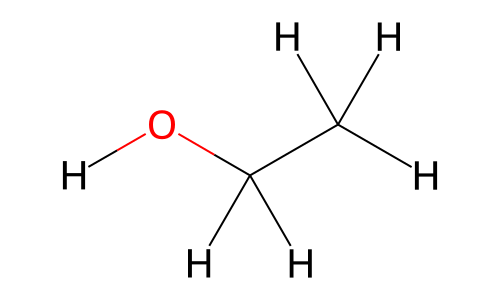

In [3]:
ethanol.visualize()

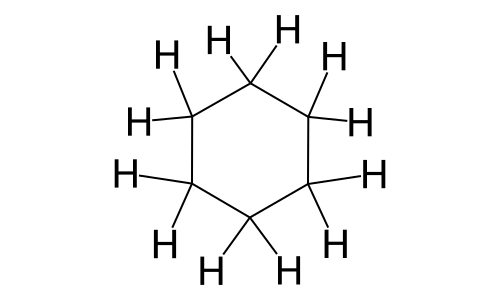

In [4]:
cyclohexane.visualize()

In [5]:
ethanol.to_topology().to_openmm()

<Topology; 1 chains, 1 residues, 9 atoms, 8 bonds>

In [6]:
topology = pack_box(
    molecules=[ethanol, cyclohexane],
    number_of_copies=[100, 100],
    box_vectors=3.5 * RHOMBIC_DODECAHEDRON * unit.nanometer,
)

In [7]:
sage = ForceField('openff-2.2.0.offxml')

In [8]:
interchange = sage.create_interchange(ethanol.to_topology())

In [11]:
molecule = Molecule.from_iupac('phenol')

ValueError: No registered toolkits can provide the capability "from_iupac" for args "('phenol',)" and kwargs "{'allow_undefined_stereo': False, '_cls': <class 'openff.toolkit.topology.molecule.Molecule'>}"
Available toolkits are: [ToolkitWrapper around The RDKit version 2024.03.3, ToolkitWrapper around AmberTools version 23.6, ToolkitWrapper around Built-in Toolkit version None]


In [9]:
interchange = Interchange.from_smirnoff(force_field=sage, topology=topology)

dyld[2693]: Library not loaded: @rpath/libblas.3.dylib
  Referenced from: <107B9A67-B3FF-3051-9705-E07A5D2AAAF4> /opt/homebrew/Caskroom/miniforge/base/envs/gcncmc/lib/libarpack.2.1.0.dylib
  Reason: tried: '/opt/homebrew/Caskroom/miniforge/base/envs/gcncmc/lib/libblas.3.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/gcncmc/lib/libblas.3.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/gcncmc/lib/libblas.3.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/gcncmc/lib/../lib/libblas.3.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/gcncmc/lib/libblas.3.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/gcncmc/bin/libblas.3.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/gcncmc/bin/../lib/libblas.3.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/gcncmc/bin/../lib/libblas.3.dylib' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/gcncmc/bin/libblas.3.dyli

ValueError: No registered toolkits can provide the capability "assign_partial_charges" for args "()" and kwargs "{'molecule': Molecule with name '' and SMILES '[H][O][C]([H])([H])[C]([H])([H])[H]', 'partial_charge_method': 'am1bcc', 'use_conformers': None, 'strict_n_conformers': False, 'normalize_partial_charges': True, '_cls': <class 'openff.toolkit.topology.molecule.Molecule'>}"
Available toolkits are: [ToolkitWrapper around The RDKit version 2024.03.3, ToolkitWrapper around AmberTools version 23.6, ToolkitWrapper around Built-in Toolkit version None]
 ToolkitWrapper around The RDKit version 2024.03.3 <class 'openff.toolkit.utils.exceptions.ChargeMethodUnavailableError'> : partial_charge_method 'am1bcc' is not available from RDKitToolkitWrapper. Available charge methods are {'mmff94': {}, 'gasteiger': {}}
 ToolkitWrapper around AmberTools version 23.6 <class 'subprocess.CalledProcessError'> : Command '['antechamber', '-i', 'molecule.sdf', '-fi', 'sdf', '-o', 'charged.mol2', '-fo', 'mol2', '-pf', 'yes', '-dr', 'n', '-c', 'bcc', '-nc', '0.0']' returned non-zero exit status 1.
 ToolkitWrapper around Built-in Toolkit version None <class 'openff.toolkit.utils.exceptions.ChargeMethodUnavailableError'> : Partial charge method "am1bcc"" is not supported by the Built-in toolkit. Available charge methods are {'zeros': {'rec_confs': 0, 'min_confs': 0, 'max_confs': 0}, 'formal_charge': {'rec_confs': 0, 'min_confs': 0, 'max_confs': 0}}


In [22]:
topology.get_positions()

Magnitude,[[2.5580999851226807 2.3094000816345215 1.714500069618225] [2.6233999729156494 2.1752002239227295 1.7313998937606812] [2.532600164413452 2.0729000568389893 1.7173999547958374] ... [2.214600086212158 1.2197999954223633 2.277100086212158] [2.1029000282287598 1.1930999755859375 1.9919999837875366] [2.2065999507904053 1.0771000385284424 2.080899953842163]]
Units,nanometer


In [26]:
topology.to_openmm().__dir__()

['_chains',
 '_numResidues',
 '_numAtoms',
 '_bonds',
 '_periodicBoxVectors',
 '__module__',
 '__doc__',
 '_standardBonds',
 '_hasLoadedStandardBonds',
 '__init__',
 '__repr__',
 'getNumAtoms',
 'getNumResidues',
 'getNumChains',
 'getNumBonds',
 'addChain',
 'addResidue',
 'addAtom',
 'addBond',
 'chains',
 'residues',
 'atoms',
 'bonds',
 'getPeriodicBoxVectors',
 'setPeriodicBoxVectors',
 'getUnitCellDimensions',
 'setUnitCellDimensions',
 'loadBondDefinitions',
 'createStandardBonds',
 'createDisulfideBonds',
 '__dict__',
 '__weakref__',
 '__new__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__getstate__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']